# Assignment 4
Emily Strong

For this assignment I am combining my data set, [FaceScrube](http://vintage.winklerbros.net/facescrub.html), with the [CIFAR-10](http://www.cs.toronto.edu/~kriz/cifar.html) to create a human face detection CNN. It is a binary classifier of face/no face. I chose the CIFAR-10 because 6 of the 10 categories are animals which will help ensure that the model specifically detects human faces instead of over generalizing or detecting a particular feature (eg eyes) instead.

In [10]:
import numpy as np
import os
from PIL import Image
import pandas as pd
import random

# Pre-Processing
I used convert.py to resize the aligned images generated by the OpenFace pipeline from my project. I then randomly selected 50,000 of them to use in the training set. I added to this 50,000 images from the [CIFAR-10](https://www.kaggle.com/c/cifar-10). Keras comes with CIFAR-10 as one of the built-in data sets however I chose to directly download them instead to ensure they would be in the same format as the face images. Each of these images needs to be converted into an RGB numpy array and labeled as face (1) or no face (0).

### 1) Create list of files

In [26]:
files = []
for filename in os.listdir('train'):
    files.append(filename)

random.shuffle(files)
files[0]

'amaury-nolasco1600.png'

### 2) Convert images to numpy arrays and create list of labels

In [27]:
images = []
labels = []
for filename in files:
    name = 'train/'+filename
    img = Image.open( name )
    img.load()
    images.append(np.asarray(img)) 
    if '-' in filename:
        labels.append(1)
    else:
        labels.append(0)

In [28]:
images[0]

array([[[ 58,  54,  45],
        [ 71,  58,  44],
        [ 83,  63,  47],
        ..., 
        [102,  83,  73],
        [ 98,  78,  69],
        [ 82,  70,  61]],

       [[ 55,  50,  43],
        [ 72,  62,  49],
        [ 82,  65,  50],
        ..., 
        [ 97,  84,  67],
        [100,  87,  71],
        [ 79,  70,  56]],

       [[ 51,  48,  42],
        [ 73,  68,  58],
        [ 75,  63,  48],
        ..., 
        [ 95,  85,  61],
        [ 96,  88,  67],
        [ 79,  69,  50]],

       ..., 
       [[ 21,  19,  14],
        [ 33,  29,  21],
        [ 46,  40,  32],
        ..., 
        [ 60,  48,  33],
        [129, 130, 123],
        [255, 255, 255]],

       [[ 27,  25,  21],
        [ 35,  31,  24],
        [ 60,  53,  43],
        ..., 
        [ 72,  60,  48],
        [ 29,  30,  25],
        [166, 167, 162]],

       [[ 62,  60,  56],
        [ 27,  23,  15],
        [ 81,  72,  59],
        ..., 
        [ 64,  50,  41],
        [ 26,  26,  26],
        [ 37,  38,

In [29]:
labels

[1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,


In [30]:
X = np.asarray(images)

In [31]:
X.shape

(100000, 32, 32, 3)

In [32]:
Y = np.asarray(labels)
Y.shape

(100000,)

### 3) Save the image arrays and labels

In [33]:
# https://wiki.python.org/moin/UsingPickle
import pickle
pickle.dump( X, open( "imagearray.pkl", "wb" ) )
pickle.dump( Y, open( "imagearray_labels.pkl", "wb" ) )

In [34]:
pickle.dump(files, open("filenames.pkl", "wb"))

### 4) Import pickle files whenever the kernel is restarted

In [1]:
import pickle

X = pickle.load( open( "imagearray.pkl", "rb" ) )
Y = pickle.load(open("imagearray_labels.pkl", "rb"))

### 5) Check that image arrays are readable

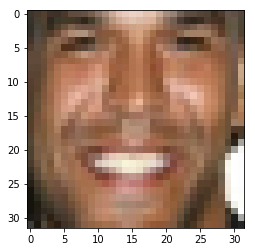

In [16]:
import matplotlib.pyplot as plt
%matplotlib inline

plotData = X[0]
plt.imshow(plotData)
plt.show()

# Part A: Deep Learning Model
I am creating a convolutional neural network using keras adapted from:
* https://github.com/nikbearbrown/NEU_COE/blob/master/CSYE_7245/Week_12/02_Convolutional_Neural_Network.ipynb 
* https://github.com/keras-team/keras/blob/master/examples/cifar10_cnn.py

In [17]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [44]:
# Set the parameters
batch_size = 32
num_classes = 1
epochs = 100
data_augmentation = False
num_predictions = 20
save_dir = os.path.join(os.getcwd(), 'saved_models')
model_name = 'keras_facedetection.h5'

In [45]:
# Train Test Split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25)

In [24]:
tf.logging.set_verbosity(tf.logging.ERROR)

In [ ]:
# Initialize model
model=Sequential()

# Add convolution layer
model.add(Conv2D(32, (3,3), padding='same', input_shape = X_train.shape[1:]))

In [47]:
model.add(Activation('relu'))

# Add second convolution
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))

# Add pooling
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

In [48]:
# Add third convolution
model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))

# Add fourth convolution
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))

# Add second pooling
model.add(MaxPooling2D(pool_size=(2,2)))

# Add dropout layer to regularized network 
model.add(Dropout(0.25))

In [49]:
# Add dense layer
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))

# Add final dense layer 
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

In [50]:
# Add optimizer
opt=keras.optimizers.rmsprop(lr=0.0001, decay=1e-6)

# Compile model
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

In [ ]:
# Scale data
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
model.fit(X_train, Y_train, batch_size = batch_size, epochs=epochs, validation_data=(X_test, Y_test), shuffle=True)

Train on 75000 samples, validate on 25000 samples
Epoch 1/100
75000/75000 [==============================] - 772s 10ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 2/100
75000/75000 [==============================] - 815s 11ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 3/100
75000/75000 [==============================] - 716s 10ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 4/100
75000/75000 [==============================] - 1056s 14ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 5/100
75000/75000 [==============================] - 842s 11ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 6/100
75000/75000 [==============================] - 998s 13ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 7/100
75000/75000 [==============================] - 949s 13ms/step - loss: 7.9693 - acc: 0.5001 - val_

Epoch 59/100
75000/75000 [==============================] - 628s 8ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 60/100
75000/75000 [==============================] - 634s 8ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 61/100
75000/75000 [==============================] - 709s 9ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 62/100
75000/75000 [==============================] - 713s 10ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 63/100
75000/75000 [==============================] - 694s 9ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 64/100
75000/75000 [==============================] - 626s 8ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 65/100
75000/75000 [==============================] - 630s 8ms/step - loss: 7.9693 - acc: 0.5001 - val_loss: 7.9769 - val_acc: 0.4996
Epoch 66/100
75000/

In [ ]:
# Save model and weights
if not os.path.isdir(save_dir):
    os.makedirs(save_dir)
model_path = os.path.join(save_dir, model_name)
model.save(model_path)
print('Saved trained model at %s ' % model_path)

In [ ]:
# Score trained model.
scores = model.evaluate(x_test, y_test, verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])